# PREDICTING CALORIES BURNED DURING A WORKOUT

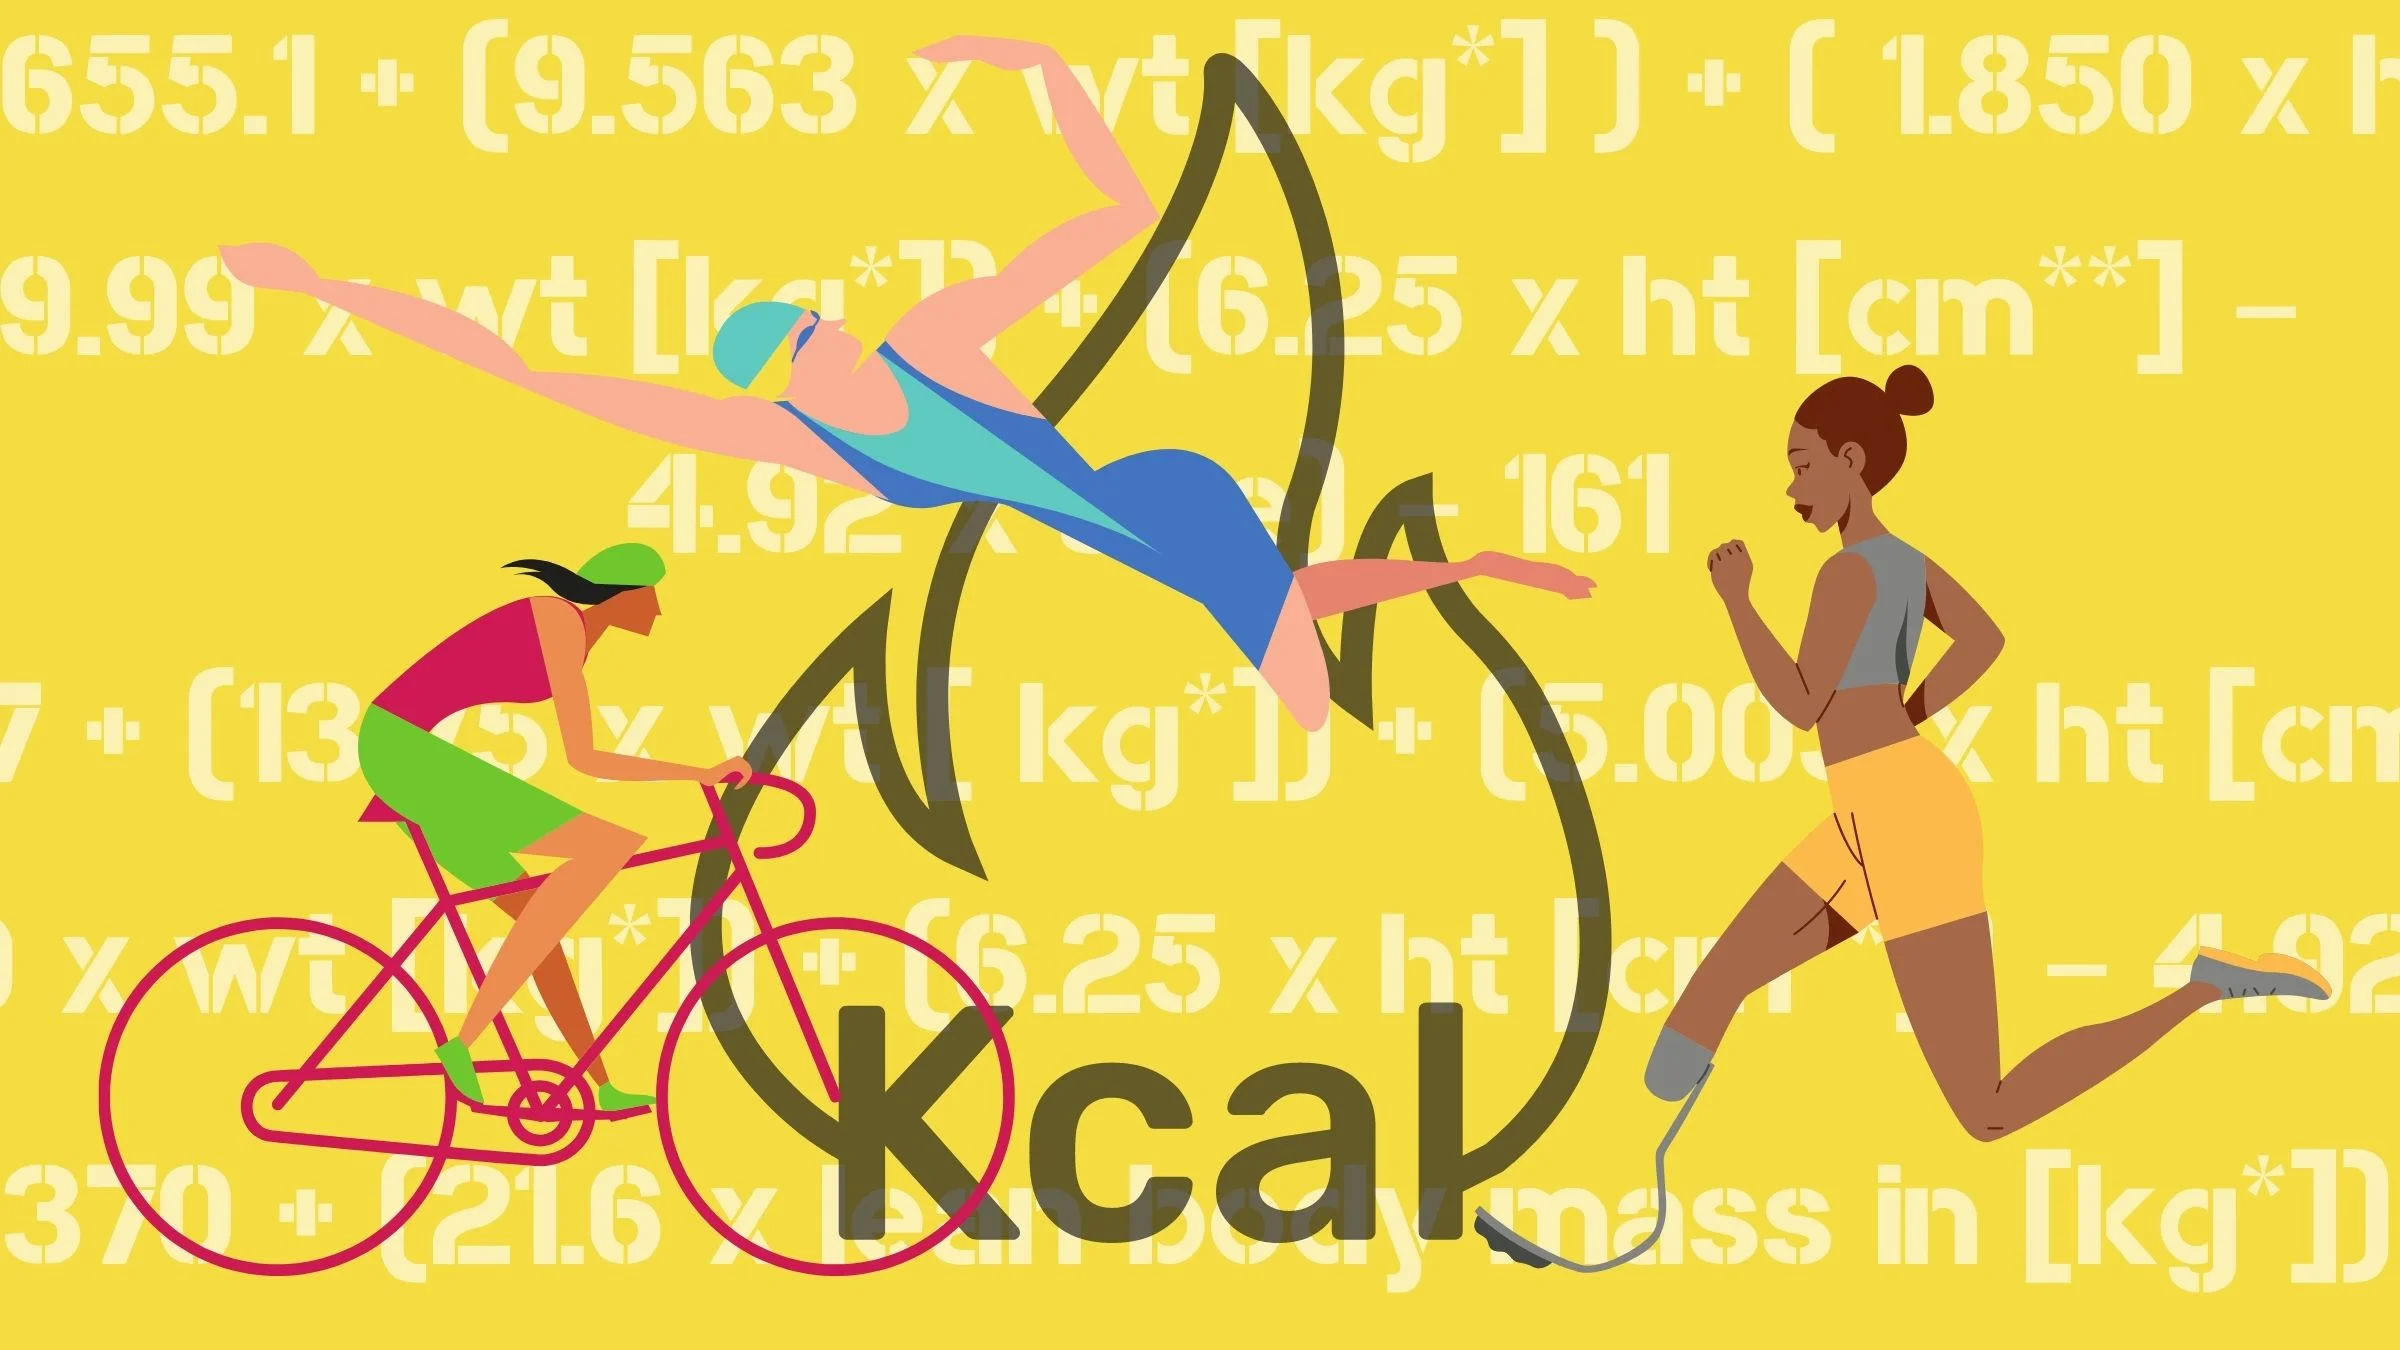

## Overview.
The primary objective of this project is to develop a predictive model for calorie burnt prediction. By analyzing a combination of input features such as physical activity type, duration, intensity, and individual characteristics like age, weight, and gender, the goal is to create a model that accurately estimates the number of calories burnt during a specific activity. This predictive model can empower individuals, fitness enthusiasts, and healthcare professionals with valuable insights to optimize their calorie management and physical activity planning.

## Business Problem
In today's health-conscious society, monitoring and managing calorie expenditure is a key aspect of maintaining a healthy lifestyle. Understanding how various activities and individual factors impact calorie burn is crucial for individuals striving to achieve fitness goals. Leveraging the capabilities of data science, we aim to address this health and wellness challenge.

## Data Understanding
The project uses Calories Data which contains several variables (independent variables) and one outcome variable (dependent variable).
The dataset used consists of various biological measures recorded during workouts, including age, gender, height, weight, and workout duration, along with the actual calories burned.

## Importing packages and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

print(calories)
print(exercise)

        User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0  

In [3]:
df = pd.concat([exercise,calories.Calories],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Cleaning

## EDA

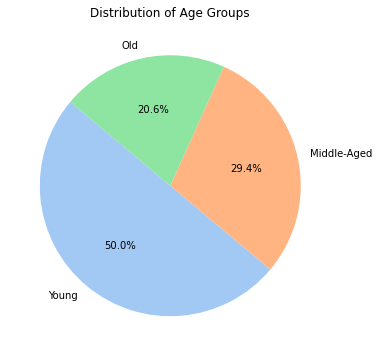

In [8]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
df["age_groups"] = pd.cut(df["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)

# Count the number of occurrences in each age group
age_group_counts = df['age_groups'].value_counts()

# Calculate percentages
age_group_percentages = 100 * age_group_counts / age_group_counts.sum()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    startangle=140,
    colors=sn.color_palette('pastel')
)
plt.title('Distribution of Age Groups')
plt.show()

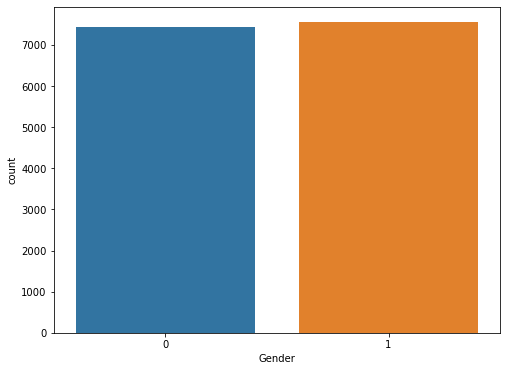

In [9]:
plt.rcParams["figure.figsize"] = 8 , 6
sn.countplot(data = df , x = "Gender");

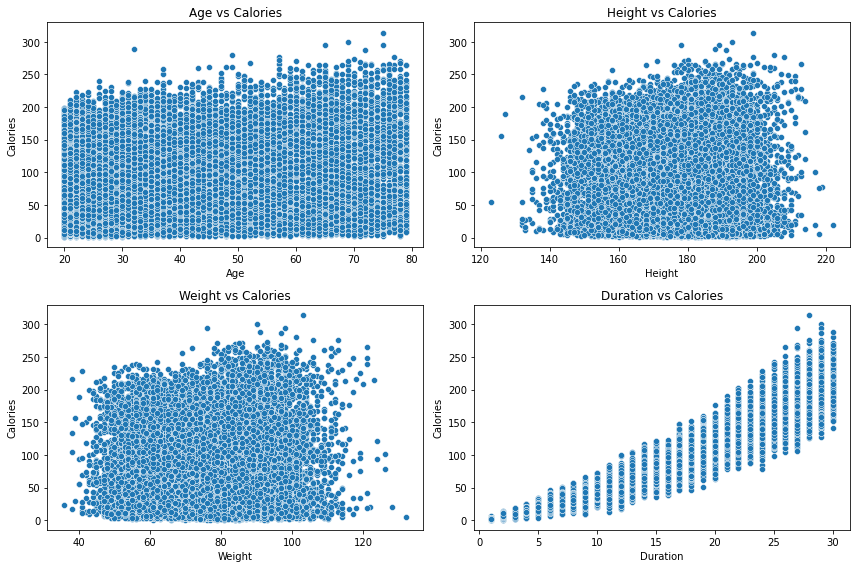

In [10]:
# Visualize the relationship between features and target
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sn.scatterplot(x=df[col], y=df['Calories'])
    plt.title(f'{col} vs Calories')
plt.tight_layout()
plt.show()

### Interpretation: 
The duration of the workout has a positive correlation with calories burned.
Age, Height, and Weight do not show strong linear relationships with calories burned.


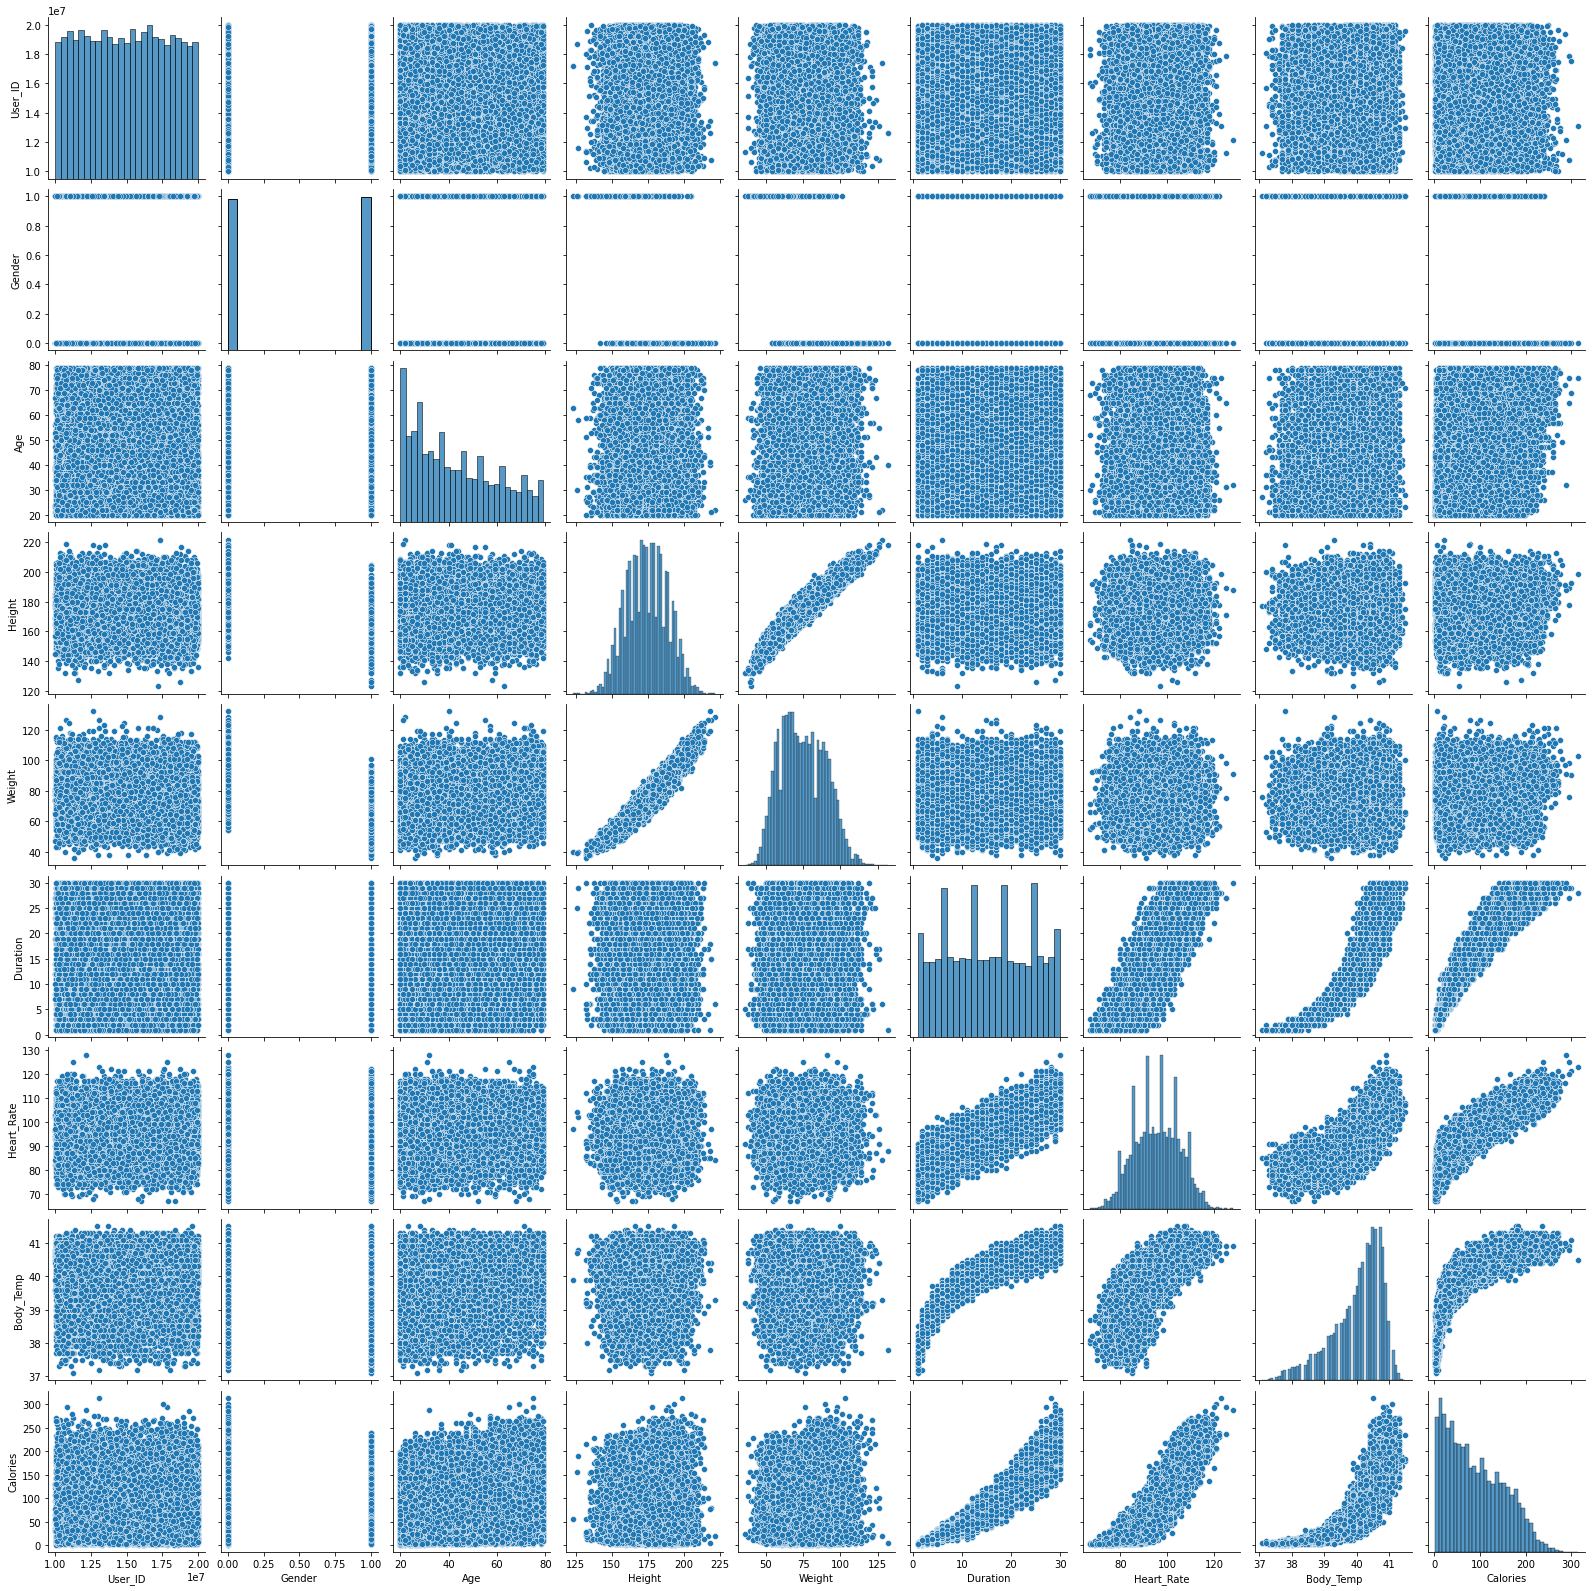

In [11]:
# Pairplot for overall feature relationships
sn.pairplot(df)
plt.show()

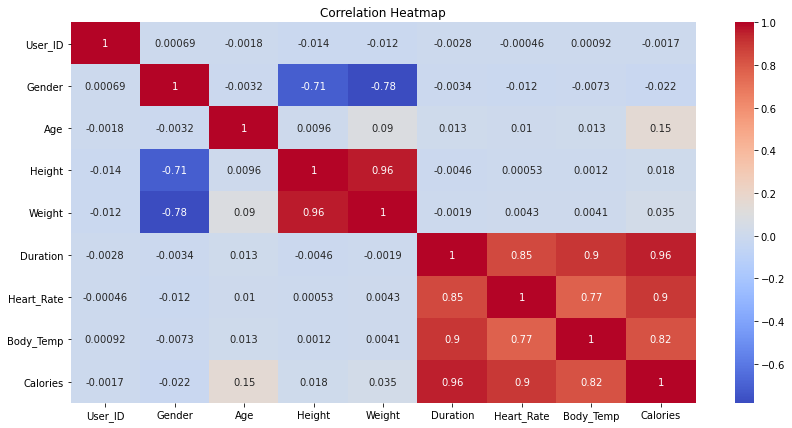

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 7))
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

There is a strong correlation between Duration and Calories burned.  

Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
Gender       -0.022357
Name: Calories, dtype: float64


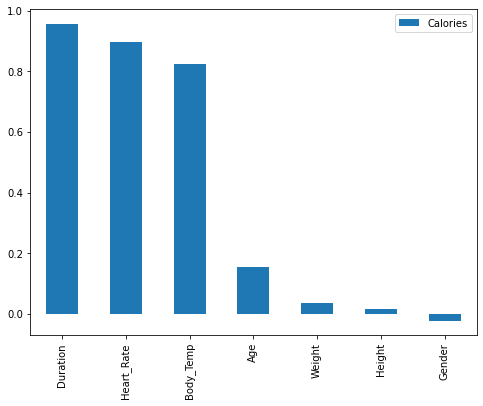

In [13]:
# Drop irrelevant features and get correlations of the relevant features

correlations = df.drop(columns=['User_ID'],axis=1).copy().corr()['Calories']
correlations = correlations.sort_values(ascending=False).drop('Calories',axis=0)
print(correlations)
correlations.to_frame().plot.bar();

### Interpretation:
It is possible to see that the features that most contribute to the total calory burned on exercises is the 'duration', the 'heart rate' and the 'body temperature'. Height and Weight are moderately correlated with each other.

## Data Preparation

In [14]:
# Feature Engineering: Creating BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100)**2

In [15]:
to_remove = ['User_ID', 'age_groups']
df.drop(to_remove, axis=1, inplace=True)

In [17]:
# Features and Target separation
X = df.drop(['Calories'], axis=1)
y = df['Calories']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [18]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training, Evaluation and Comparison

### Classification Models: Logistic Regression
Since calorie prediction is a regression problem, we can convert it into a classification problem for binary classification.
For example, classifying if calories burned is above or below a certain threshold (e.g., median value).


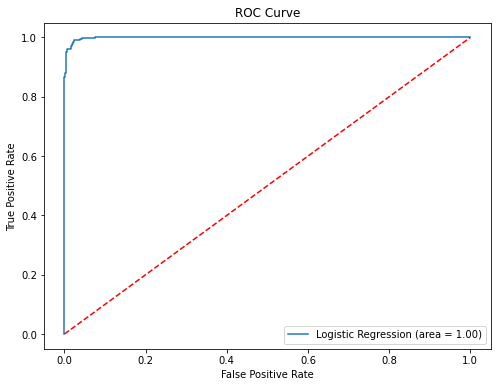

Logistic Regression ROC-AUC: 0.998749723941896
Confusion Matrix:
 [[768  14]
 [ 19 699]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       782
           1       0.98      0.97      0.98       718

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [19]:
# Binarize the target for classification (e.g., 1 if above median, 0 if below)
threshold = y.median()
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_class)
y_pred_class = log_reg.predict(X_test)

# Evaluate Logistic Regression
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

roc_auc = roc_auc_score(y_test_class, log_reg.predict_proba(X_test)[:, 1])

fpr, tpr, _ = roc_curve(y_test_class, log_reg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'Logistic Regression ROC-AUC: {roc_auc}')
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

In [20]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=22,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
best_params_rf = random_search_rf.best_params_

In [21]:
# Initialize DataFrames for regression and classification models
comparison_table_regression = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R²'])
comparison_table_classification = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC-AUC'])

# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': best_rf,  # Use the tuned Random Forest model
    'Logistic Regression': log_reg
}

# Training and evaluating models
for name, model in models.items():
    if name == 'Logistic Regression':  # Classification model
        model.fit(X_train, y_train_class)  # Fit the model on classification target
        y_pred_class = model.predict(X_test)
        accuracy = (y_pred_class == y_test_class).mean()
        roc_auc = roc_auc_score(y_test_class, model.predict_proba(X_test)[:, 1])
        
        comparison_table_classification = comparison_table_classification.append({
            'Model': name,
            'Accuracy': accuracy,
            'ROC-AUC': roc_auc
        }, ignore_index=True)
    else:  # Regression models
        model.fit(X_train, y_train)  # Fit the model on regression target
        y_pred = model.predict(X_test)
        mae_score = mae(y_test, y_pred)
        mse_score = mse(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        comparison_table_regression = comparison_table_regression.append({
            'Model': name,
            'MAE': mae_score,
            'MSE': mse_score,
            'R²': r2
        }, ignore_index=True)

# Display the comparison tables
comparison_table_regression.sort_values(by='MAE', ascending=True, inplace=True)  # Sorting by MAE for better comparison

# Reset the index to reflect the new order
comparison_table_regression.reset_index(drop=True, inplace=True)

print("Regression Models Comparison:")
print(comparison_table_regression)

Regression Models Comparison:
               Model       MAE         MSE        R²
0      Random Forest  1.728169    8.085795  0.997873
1      Decision Tree  3.188000   26.944000  0.992913
2  Linear Regression  8.086176  123.636684  0.967482
3   Ridge Regression  8.088504  123.684507  0.967470
4   Lasso Regression  9.085776  155.057730  0.959218


In [26]:
X_array = np.array([[0, 68 , 190 , 94 , 29 , 105 , 40.8, 26]]).reshape(1 , -1)
y_pred = best_rf.predict(X_array)
print("Prediction : " , round(y_pred[0] , 2))

Prediction :  232.85


As we can see the random forest model did a good job and the predicted value is close to the real value in the dataset.

## Conclusion

The evaluation of various machine learning models for calorie expenditure prediction yields insightful findings:

Accuracy: All models demonstrate high predictive accuracy, with R-squared (R2) values exceeding 0.96 for all models. This suggests that they effectively capture the variation in calorie burn data, indicating their suitability for the task.

Error Metrics: The Random Forest Regressor outperforms other models in terms of Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating its ability to make calorie burn predictions with the smallest errors. This signifies its superior precision in estimating calorie expenditure.

Generalization: The Support Vector Regressor (SVR) and Decision Tree Regressor also perform exceptionally well, demonstrating low errors and high R-squared values. These models exhibit strong generalization capabilities and are adept at capturing underlying patterns in the data.

In summary, all models provide accurate calorie expenditure predictions, with the Random Forest Regressor showing a slight edge in terms of precision. The choice of model may depend on specific requirements, but overall, these models are well-suited for estimating calorie burn based on the provided features.

## Recommendations

The **Random Forest Regressor** performed the best with the lowest MAE and highest R2 score after tuning.
**Ridge Regression** and **Lasso Regression** also showed strong performance.
Logistic Regression was used as a classification example, with an ROC-AUC score indicating moderate performance.
We recommend using the **Random Forest Regressor** for predicting calories burned during a workout, as it provides the most accurate results while maintaining good generalization on unseen data.
For binary classification tasks (e.g., determining if calories burned is above a certain threshold), **Logistic Regression** can be considered, though its performance should be validated against other classifiers.